## Linear Regression with Scikit-Learn

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score,KFold


### Reading Data

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188.0,19.1,370.31,25.41,17.3
1,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403.0,14.7,321.02,15.12,17.0
2,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666.0,20.2,302.76,24.10,13.3
3,0.03551,25.0,4.86,0,0.426,6.167,46.7,5.4007,4,281.0,19.0,390.64,7.51,22.9
4,6.80117,0.0,18.10,0,0.713,6.081,84.4,2.7175,24,666.0,20.2,396.90,14.70,20.0
5,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300.0,16.6,379.41,6.36,23.7
6,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
7,0.52058,0.0,6.20,1,0.507,6.631,76.5,4.1480,8,307.0,17.4,388.45,9.54,25.1
8,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42,16.4
9,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666.0,20.2,350.65,14.19,19.9


In [3]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Preprocessing

### Plot Data Statistics

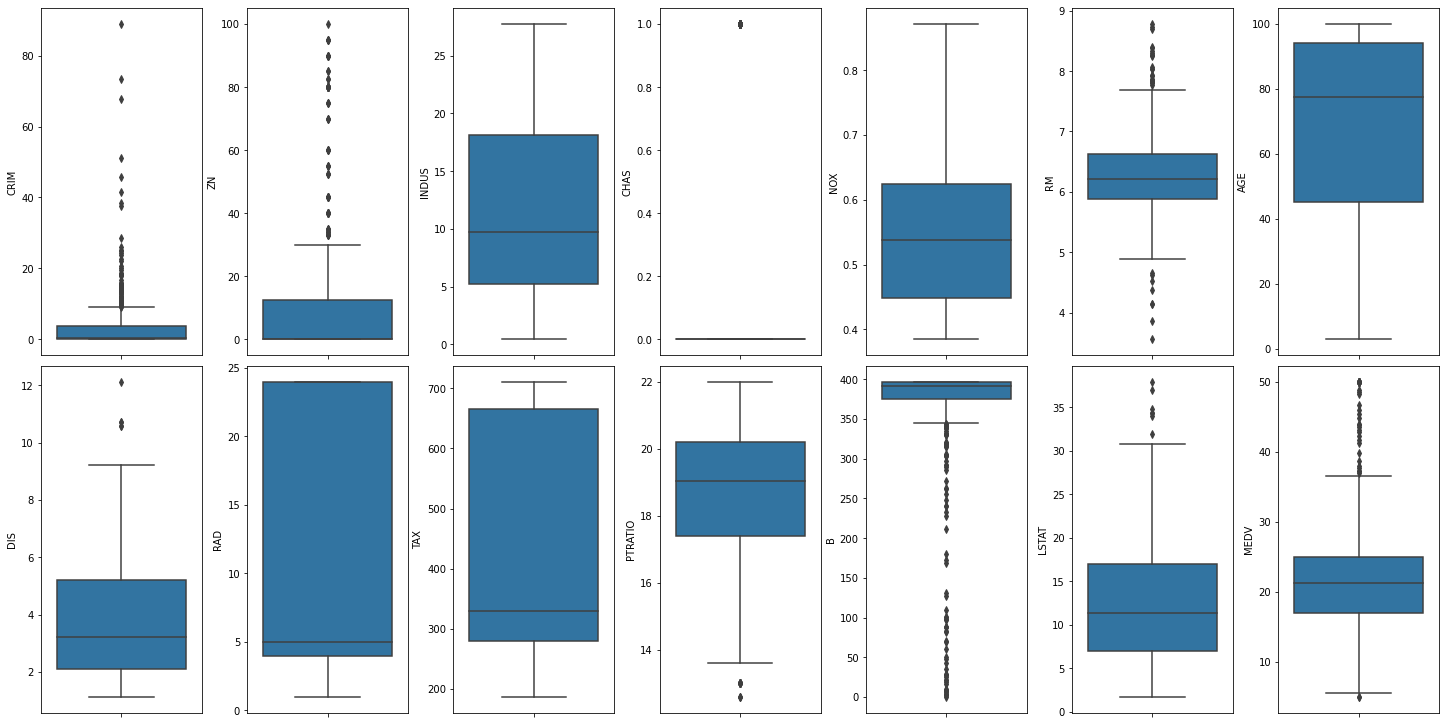

In [4]:
fig,axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k,data=dataset,ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad = 0.5, h_pad=0.5)

### Checking Outliers

In [5]:
for k, v in dataset.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


### Removing Outliers

In [6]:
dataset = dataset[~(dataset['MEDV'] >= 40.0)]
print(np.shape(dataset))

(475, 14)


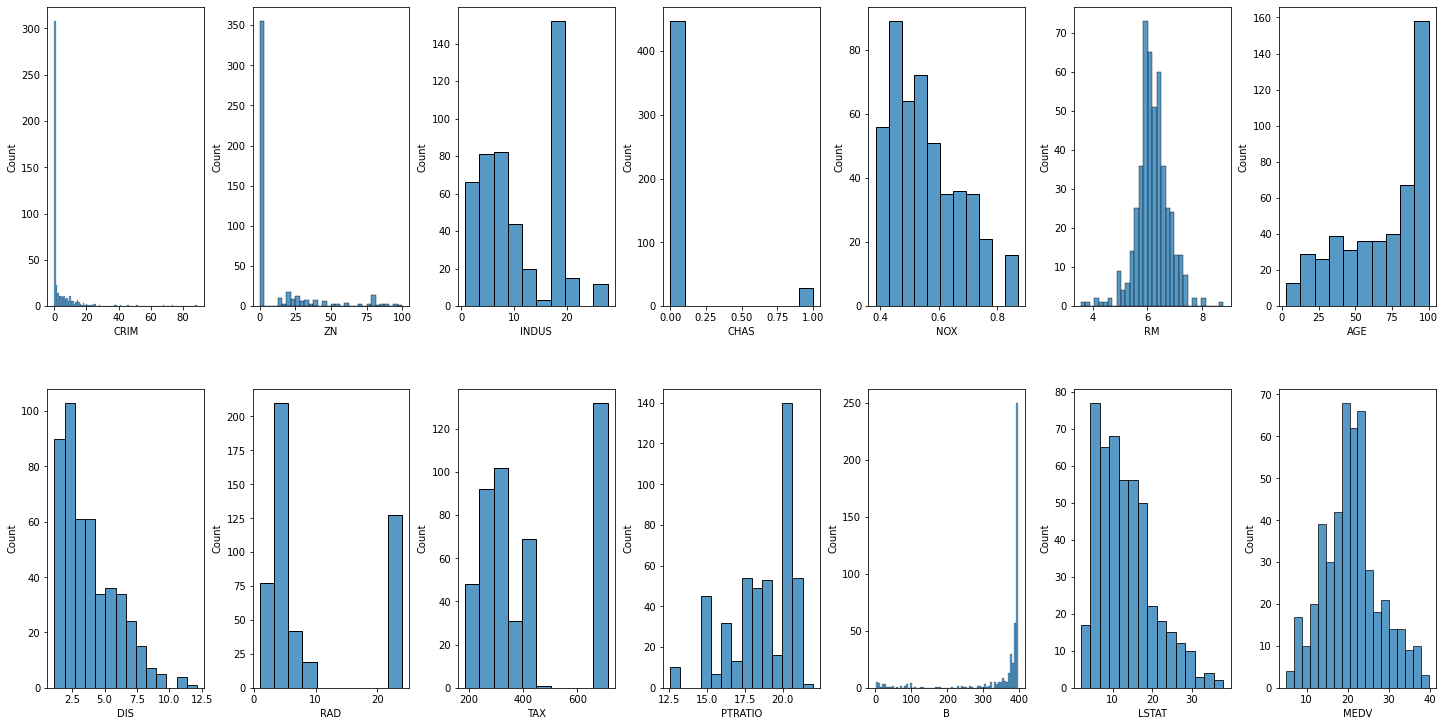

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Print Correlation

<AxesSubplot:>

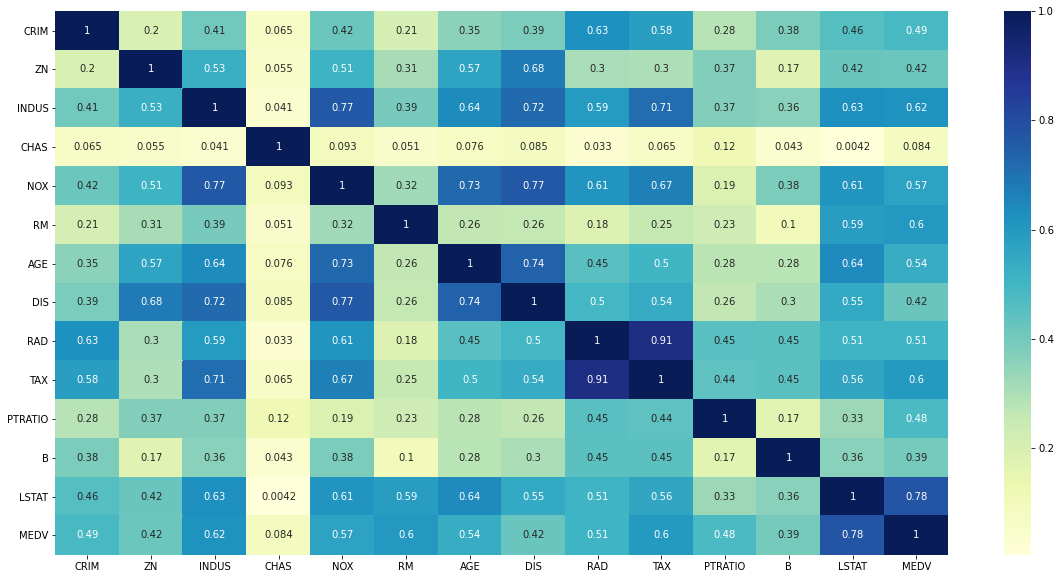

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr().abs(), annot=True, cmap = 'YlGnBu')

### Scaling

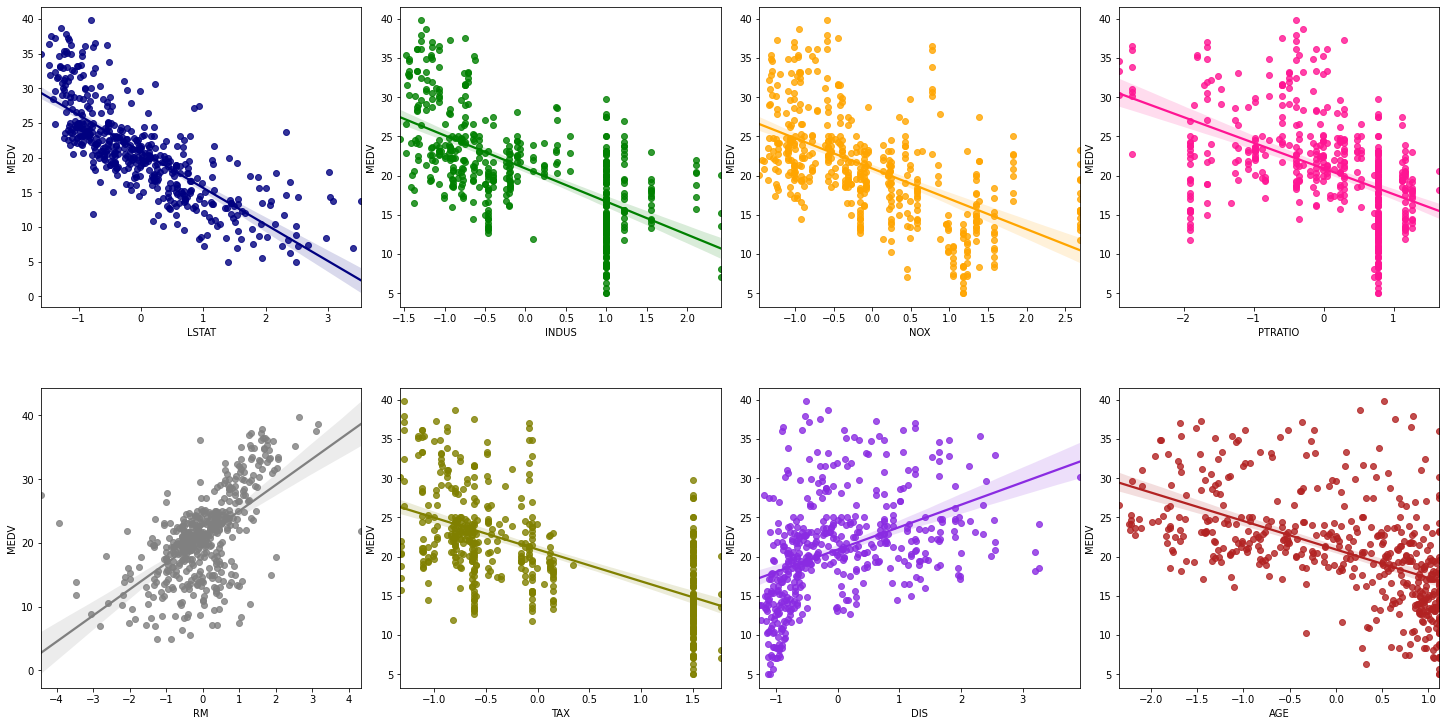

In [9]:
std_scaler = preprocessing.StandardScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
colors = ['navy','green','orange','deeppink','grey','olive','blueviolet','firebrick']
x = dataset.loc[:,column_sels]
y = dataset['MEDV']
x = pd.DataFrame(data=std_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i], color = colors[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
y_train.values.shape

(356,)

### Simple Linear Regression

In [172]:
linear_regressor = linear_model.LinearRegression(normalize=True)
linear_regressor.fit(x_train.values, y_train)
linear_regressor.coef_

array([-2.96122395, -0.58887265, -1.63835441, -1.63950278,  1.30251757,
       -0.53535983, -1.68016479, -0.35511177])

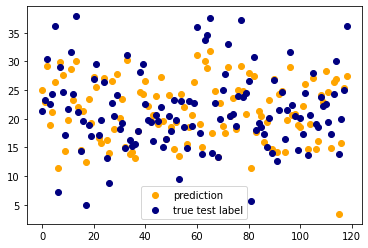

In [173]:
pred_y = linear_regressor.predict(x_test.values)
# plt.plot(x_test,pred_y,label='Linear Regression')
plt.scatter(range(len(pred_y)),pred_y,color='orange',label='prediction')
plt.scatter(range(len(y_test)),y_test,color='navy',label='true test label')
plt.legend()

In [174]:
MSE = (((pred_y - y_test)**2).mean())
MSE

13.692492951589797

In [175]:
LR = linear_model.LinearRegression()
kf = KFold(n_splits=5)
scores = cross_val_score(LR,x,y,cv=kf,scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -13.03 (+/- 1.78)


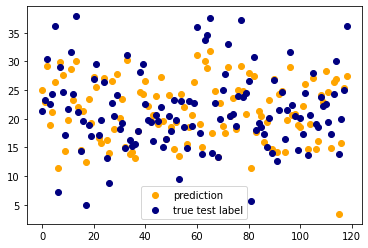

In [176]:
pred_y = linear_regressor.predict(x_test.values)
# plt.plot(x_test,pred_y,label='Linear Regression')
plt.scatter(range(len(pred_y)),pred_y,color='orange',label='prediction')
plt.scatter(range(len(y_test)),y_test,color='navy',label='true test label')
plt.legend()

### Ridge Regression

In [177]:
linear_regressor = linear_model.Ridge(True)
linear_regressor.fit(x_train.values, y_train)
linear_regressor.coef_

array([-2.94474878, -0.58942794, -1.61583884, -1.63066945,  1.30807605,
       -0.54500561, -1.65745135, -0.36045722])

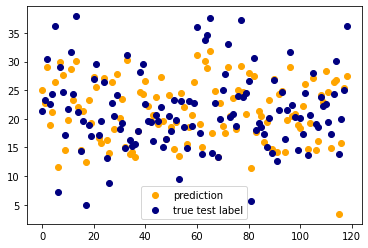

In [178]:
pred_y = linear_regressor.predict(x_test.values)
# plt.plot(x_test,pred_y,label='Linear Regression')
plt.scatter(range(len(pred_y)),pred_y,color='orange',label='prediction')
plt.scatter(range(len(y_test)),y_test,color='navy',label='true test label')
plt.legend()

In [179]:
MSE = (((pred_y - y_test)**2).mean())
MSE

13.686002737665815

### Lasso Regression

In [183]:
linear_regressor = linear_model.Lasso()
linear_regressor.fit(x_train.values, y_train)
linear_regressor.coef_

array([-2.93480053, -0.16646615, -0.35111328, -0.76874602,  0.84318919,
       -0.51092225,  0.        , -0.        ])

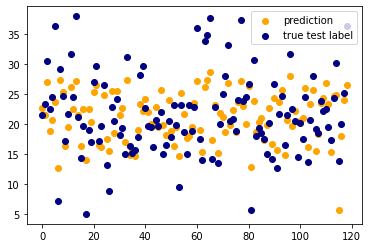

In [184]:
pred_y = linear_regressor.predict(x_test.values)
# plt.plot(x_test,pred_y,label='Linear Regression')
plt.scatter(range(len(pred_y)),pred_y,color='orange',label='prediction')
plt.scatter(range(len(y_test)),y_test,color='navy',label='true test label')
plt.legend()

In [185]:
MSE = (((pred_y - y_test)**2).mean())
MSE

16.86258721520893

### Elastic Net

In [188]:
linear_regressor = linear_model.ElasticNet()
linear_regressor.fit(x_train.values, y_train)
linear_regressor.coef_

array([-1.71675236, -0.53666081, -0.57204747, -0.836983  ,  1.12043552,
       -0.67642711,  0.        , -0.3264397 ])

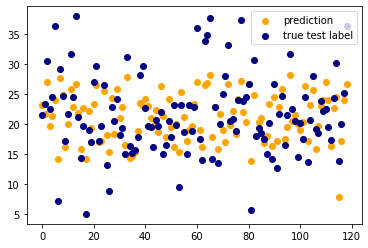

In [189]:
pred_y = linear_regressor.predict(x_test.values)
# plt.plot(x_test,pred_y,label='Linear Regression')
plt.scatter(range(len(pred_y)),pred_y,color='orange',label='prediction')
plt.scatter(range(len(y_test)),y_test,color='navy',label='true test label')
plt.legend()

In [190]:
MSE = (((pred_y - y_test)**2).mean())
MSE

17.509354289685295